# Training set y Testing set

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("../datasets/exercises/downloaded_covid_effects.csv")

In [15]:
data.head()

,Unnamed: 0,Direction,Year,Date,Weekday,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,0,Exports,2015,31/01/2015,Saturday,01/02/2020,All,All,All,$,257000000,257000000
1,1,Exports,2015,01/02/2015,Sunday,02/02/2020,All,All,All,$,123000000,380000000
2,2,Exports,2015,02/02/2015,Monday,03/02/2020,All,All,All,$,176000000,556000000
3,3,Exports,2015,03/02/2015,Tuesday,04/02/2020,All,All,All,$,115000000,671000000
4,4,Exports,2015,04/02/2015,Wednesday,05/02/2020,All,All,All,$,74000000,746000000


In [16]:
len(data)

76766

## Dividir utilizando la distribución normal

In [17]:
a = np.random.randn(len(data))

(array([3.6000e+01, 5.3200e+02, 4.0820e+03, 1.5290e+04, 2.5814e+04,
        2.0963e+04, 8.3060e+03, 1.5680e+03, 1.6700e+02, 8.0000e+00]),
 array([-4.20270017, -3.31539896, -2.42809776, -1.54079656, -0.65349536,
         0.23380585,  1.12110705,  2.00840825,  2.89570945,  3.78301065,
         4.67031186]),
 <a list of 10 Patch objects>)

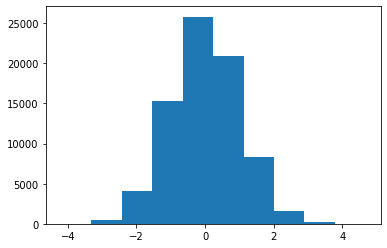

In [18]:
plt.hist(a)

In [19]:
check = (a<.8)

In [20]:
check

array([ True,  True,  True, ...,  True,  True,  True])

(array([16178.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 60588.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

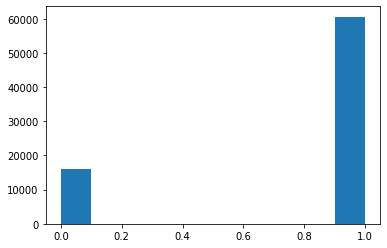

In [23]:
plt.hist(check.astype(int))

In [24]:
training = data[check]
testing = data[~check]

In [25]:
len(training)

60588

In [26]:
len(testing)

16178

## Con la libreria sklearn

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train, test = train_test_split(data, test_size = .2)

In [29]:
len(train)

61412

In [30]:
len(test)

15354

## Usando DataFrame.sample()

In [36]:
data2 = data.sample(frac=1).reset_index(drop=True)

In [37]:
data2.head()

,Unnamed: 0,Direction,Year,Date,Weekday,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,15988,Exports,2016,03/12/2016,Saturday,05/12/2020,Total (excluding China),All,All,$,101000000,33359000000
1,61259,Imports,2020,21/07/2020,Tuesday,21/07/2020,China,All,All,$,51000000,5442000000
2,40681,Exports,2016,12/04/2016,Tuesday,14/04/2020,China,Forestry,All,$,8000000,435000000
3,69031,Imports,2020,21/10/2020,Wednesday,21/10/2020,All,Machinery and electronics,All,$,51000000,9395000000
4,32974,Exports,2016,14/02/2016,Sunday,16/02/2020,China,Dairy,All,$,6000000,129000000


## Usando Shuffle de sklearn

In [40]:
import sklearn as sk
data3 = sk.utils.shuffle(data).reset_index(drop=True)
data3.head()

,Unnamed: 0,Direction,Year,Date,Weekday,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,44927,Exports,2017,13/07/2017,Thursday,09/07/2020,United States,Meat,All,$,3000000,940000000
1,56334,Exports,2017,22/03/2017,Wednesday,18/03/2020,East Asia (excluding China),Dairy,All,Tonnes,2000,120000
2,38950,Exports,2016,08/10/2016,Saturday,10/10/2020,China,Seafood,All,$,1000000,401000000
3,36788,Exports,2016,07/02/2016,Sunday,09/02/2020,China,Meat,All,Tonnes,1000,8000
4,5821,Exports,2015,02/04/2015,Thursday,02/04/2020,United States,All,All,$,13000000,1133000000


In [44]:
cut_id = int(.8*len(data2))
train_data = data2[:cut_id]
test_data = data2[cut_id+1:]

In [45]:
len(train_data)

61412

In [46]:
len(test_data)

15353